In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
### Section-1: Load and Visualise the Data
# Download
# Load
# Visualise
# Normalisation

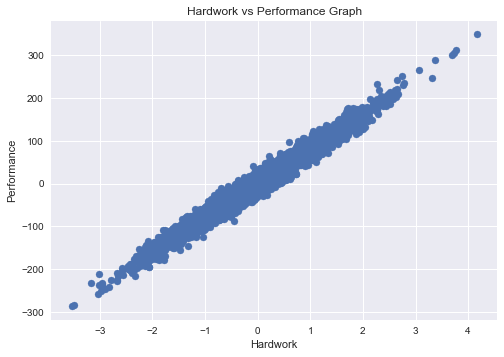

In [30]:
# Load
X = pd.read_csv('Linear_X_Train.csv')
y = pd.read_csv('Linear_Y_Train.csv')

# Convert X and y into numpy arrays
X = X.values
y = y.values

# Normalisation - (Only normalise x values)
mean = X.mean()
std = X.std()
X = (X-mean)/std

# Visualise
plt.style.use('seaborn')
plt.scatter(X,y)
plt.title("Hardwork vs Performance Graph")
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

In [26]:
### Section 2: Linear Regression

In [45]:
# Cal Hypothesis(y_), y_ = theta1.x + theta0... {y^ = y_ = predicted value}
def hypothesis(x, theta):
    # theta = [theta0, theta1]
    y_ = theta[1]*x + theta[0]
    return y_

# Cal Gradient = [Gradient0, Gradient1]
def gradient(X,Y,theta):
    m = X.shape[0] # no of examples in X = (3750,1) - 3750!!!
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        
        grad[0] += (y_ - y)
        grad[1] += (y_ - y) * x
        
    return grad/m


def gradientDescent(X, Y, max_steps = 100, learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        # compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        # Update theta
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        
    return theta, error_list

# Calculation average error
def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m
    


In [46]:
theta, error_list = gradientDescent(X,y)

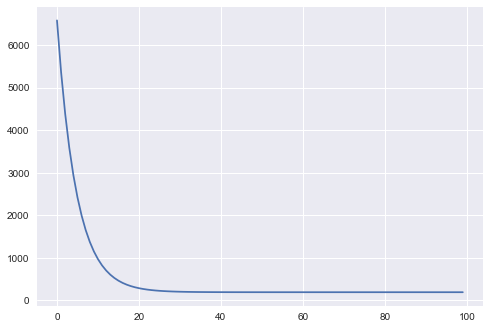

In [48]:
plt.title('Reduction Error over Time')
plt.plot(error_list)
plt.show()

In [49]:
### Section-3: Predictions and Best Line

In [51]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


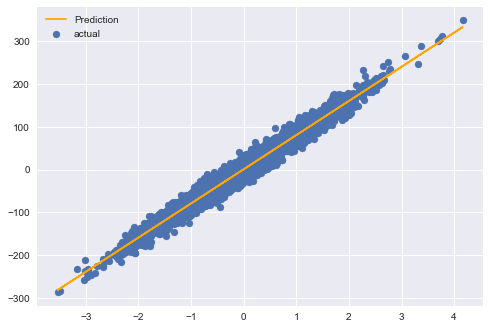

In [55]:
# Training + Predictions
plt.scatter(X,y, label = 'actual')
plt.plot(X,y_, color='orange', label = 'Prediction')
plt.legend()
plt.show()

In [57]:
# Load the Test Data 
x_test = pd.read_csv('Linear_X_Test.csv').values
y_test = hypothesis(x_test, theta)
print(y_test)

[[-149.37069577]
 [ -68.75494042]
 [-201.48687035]
 ...
 [  10.9121384 ]
 [ -21.53235759]
 [ -53.68460035]]


In [58]:
# Saving File
df = pd.DataFrame(data=y_test, columns=["y"])
df.to_csv('y_prediction.csv', index=False)

In [59]:
### Section-4: Computing Score
# Score : R2 (R-squared) or Coefficient of Determination

In [60]:
def r2_score(Y, Y_):
    num = np.sum((Y - Y_)**2)
    den = np.sum((Y - Y.mean())**2)
    
    score = (1-num/den)
    return score*100

In [61]:
r2_score(y,y_)

97.09612226971643